1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm
from scipy.integrate import trapz

npr.seed(123)

import matplotlib.pyplot as plt
#%matplotlib inline

N = 500
std = 1
mean = 0

x = npr.normal(loc = mean, scale = std, size = N)

n, bins, _ = plt.hist(x, bins=20)
plt.ylabel('counts')


mean_bins = 1/2 * ( bins[1:]+bins[:-1])
err = np.sqrt(np.abs(n))

plt.errorbar(mean_bins, n, xerr = 0, yerr = err, fmt='o',capthick=1, capsize=4)

plt.show()

k = np.arange(-3,4,0.01)
std = 1.06*x.std()*np.power(len(x),-1/5)

[plt.plot(k,norm.pdf(k,x[i],scale = std), lw=0.5) for i in range(len(x))]

plt.show()

m = np.sum([norm.pdf(k,x[i],scale = std) for i in range(len(x))],axis=0)
plt.plot(k,m)
plt.show()

norm = trapz(m,k)
normhist = (bins[1]-bins[0])*np.sum(n)

g = m*normhist/norm

plt.hist(x, bins=20)
plt.plot(k,g)
plt.show()
#print(norm)

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

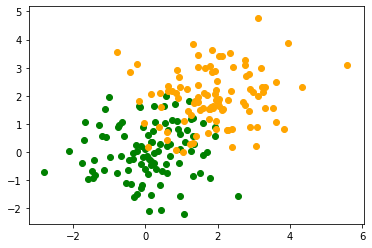

In [2]:
N = 100

def gauss_2d(mu, sigma):
    x = npr.normal(loc = mu, scale = sigma, size = N)
    y = npr.normal(loc = mu, scale = sigma, size = N)
    return (x, y)

cat1x,cat1y = gauss_2d(0,1)
cat2x,cat2y = gauss_2d(2,1)

plt.scatter(cat1x,cat1y, c = 'green')
plt.scatter(cat2x,cat2y, c = 'orange')

plt.show()

/bin/sh: wget: command not found


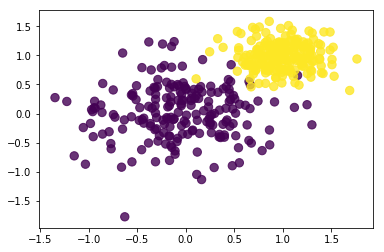

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('/Users/alicepagano/Documents/Università/Magistrale-1°anno/Laboratory of Computational Physics/Course/Laboratory/LaboratoryOfComputationalPhysics/two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
    
import matplotlib.pyplot as plt

data = np.load('/Users/alicepagano/Documents/Università/Magistrale-1°anno/Laboratory of Computational Physics/Course/Laboratory/LaboratoryOfComputationalPhysics/residuals_261.npy',allow_pickle=True)

df = pd.DataFrame(data.item(),columns=["residuals", "distances"])

df = df[np.abs(df['residuals'])<2]

import seaborn as sns

#fig = plt.figure( figsize = (10,10) )
#plt.plot(df_2['residuals'], df_2['residuals']*slope + intercept)

Text(27.125, 0.5, 'Residuals')

<Figure size 720x720 with 0 Axes>

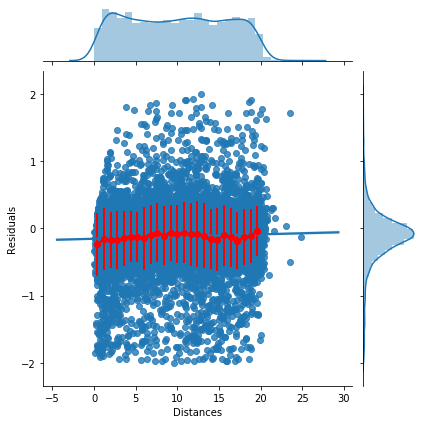

In [5]:
fig = plt.figure(figsize = (10,10))

plot = sns.jointplot(x="distances", y="residuals", data=df, kind= "reg")

#slope, intercept, r_value, p_value, std_err = stats.linregress(df['residuals'], df['distances'])

nbins = 25
xmin = 0
xmax = 20

binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
bincenters = xmin + ((xmax-xmin)/nbins) * np.arange(nbins) + ((xmax-xmin)/(2*nbins))

x = bincenters 

df['bin'] = np.digitize(df['distances'], binedges)
ProfileFrame = pd.DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
bins = ProfileFrame.index.values

for bin in bins:
    ProfileFrame.loc[bin,'ymean'] = df.loc[df['bin']==bin,'residuals'].mean()
    ProfileFrame.loc[bin,'yStandDev'] = df.loc[df['bin']==bin,'residuals'].std()
    ProfileFrame.loc[bin,'yMeanError'] = ProfileFrame.loc[bin,'yStandDev'] #/ np.sqrt(ProfileFrame.loc[bin,'N'])

plt.errorbar(ProfileFrame['bincenters'],ProfileFrame['ymean'], xerr=(xmax-xmin)/(2*nbins),linewidth=2, yerr=ProfileFrame['yMeanError'],label='Profile Plot', color='red',marker='o')
plt.xlabel('Distances')
plt.ylabel('Residuals')